In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
import plotly.express as px
from sklearn.metrics import silhouette_score,silhouette_samples,davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv("C:/Users/Hp/Downloads/marketing_campaign/marketing_campaign.csv",sep="\t")

In [3]:
data2 = data.copy()

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
data.corr()

C:\Users\Hp\AppData\Local\Temp\ipykernel_13332\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [6]:
data = data[["Income","Year_Birth","Education","Marital_Status","Kidhome","Teenhome","Recency","MntWines"]]
data

,Income,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines
0,58138.0,1957,Graduation,Single,0,0,58,635
1,46344.0,1954,Graduation,Single,1,1,38,11
2,71613.0,1965,Graduation,Together,0,0,26,426
3,26646.0,1984,Graduation,Together,1,0,26,11
4,58293.0,1981,PhD,Married,1,0,94,173
...,...,...,...,...,...,...,...,...
2235,61223.0,1967,Graduation,Married,0,1,46,709
2236,64014.0,1946,PhD,Together,2,1,56,406
2237,56981.0,1981,Graduation,Divorced,0,0,91,908
2238,69245.0,1956,Master,Together,0,1,8,428


In [7]:
data.isna().sum()

Income            24
Year_Birth         0
Education          0
Marital_Status     0
Kidhome            0
Teenhome           0
Recency            0
MntWines           0
dtype: int64

In [8]:
data["Income"].fillna(data["Income"].median(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13332\368225885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Income"].fillna(data["Income"].median(), inplace=True)


In [9]:
data.isna().sum()

Income            0
Year_Birth        0
Education         0
Marital_Status    0
Kidhome           0
Teenhome          0
Recency           0
MntWines          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2240 non-null   float64
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Kidhome         2240 non-null   int64  
 5   Teenhome        2240 non-null   int64  
 6   Recency         2240 non-null   int64  
 7   MntWines        2240 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 140.1+ KB


# KMeans


In [11]:
numerical_data = data.select_dtypes("int64","float64")
numerical_data

,Year_Birth,Kidhome,Teenhome,Recency,MntWines
0,1957,0,0,58,635
1,1954,1,1,38,11
2,1965,0,0,26,426
3,1984,1,0,26,11
4,1981,1,0,94,173
...,...,...,...,...,...
2235,1967,0,1,46,709
2236,1946,2,1,56,406
2237,1981,0,0,91,908
2238,1956,0,1,8,428


In [12]:
obj_data = data.select_dtypes("object")
obj_data

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [13]:
print(np.unique(obj_data["Education"]))
print(np.unique(obj_data["Marital_Status"]))

['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


In [14]:
labe = LabelEncoder()
ohe = OneHotEncoder()
obj_data = obj_data.apply(labe.fit_transform)
data_ohe  = ohe.fit_transform(obj_data.values).toarray()

In [15]:
data = np.concatenate([numerical_data,data_ohe],axis  = 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [18]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.621359,0.0,0.0,0.585859,0.425318,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592233,0.5,0.5,0.383838,0.007368,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.699029,0.0,0.0,0.262626,0.285332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.883495,0.5,0.0,0.262626,0.007368,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.854369,0.5,0.0,0.949495,0.115874,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.718447,0.0,0.5,0.464646,0.474883,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.514563,1.0,0.5,0.565657,0.271936,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.854369,0.0,0.0,0.919192,0.608171,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.611650,0.0,0.5,0.080808,0.286671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=14), k=(2, 15))

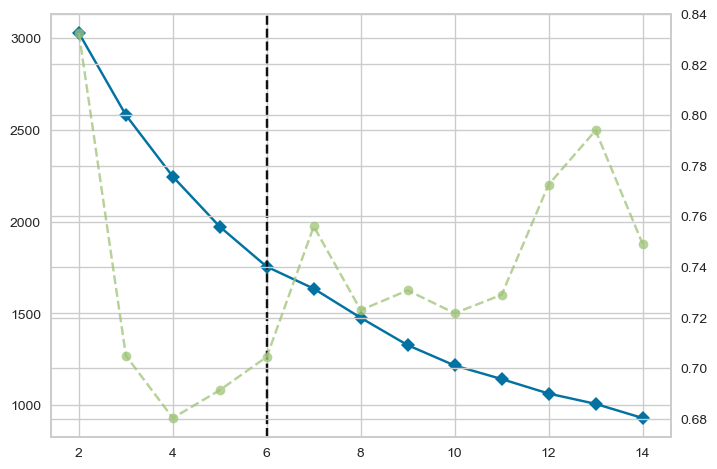

In [19]:
model = KMeans()
km_el_vi = KElbowVisualizer(estimator = model,k = (2,15))
km_el_vi.fit(data)

In [20]:
model_final = KMeans(n_clusters=6)
model_final.fit(data)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [24]:
data2["lable"] = model_final.labels_

In [25]:
data2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,lable
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,5
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,5
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,2
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,3


In [27]:
data2.drop(columns="ID").groupby("lable").count()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
lable,,,,,,,,,,,,,,,,,,,,,
0,486,486,486,481,486,486,486,486,486,486,...,486,486,486,486,486,486,486,486,486,486
1,428,428,428,422,428,428,428,428,428,428,...,428,428,428,428,428,428,428,428,428,428
2,453,453,453,449,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
3,370,370,370,365,370,370,370,370,370,370,...,370,370,370,370,370,370,370,370,370,370
4,203,203,203,200,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203
5,300,300,300,299,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300


In [28]:
data2.drop(columns="ID").groupby("lable").size()

lable
0    486
1    428
2    453
3    370
4    203
5    300
dtype: int64

In [29]:
data2.drop(columns="ID").groupby("lable").describe()

Year_Birth                                                          \
           count         mean        std     min     25%     50%     75%   
lable                                                                      
0          486.0  1966.043210  11.975584  1899.0  1957.0  1967.0  1974.0   
1          428.0  1970.334112  11.945938  1945.0  1961.0  1970.0  1979.0   
2          453.0  1970.686534  11.356208  1944.0  1962.0  1972.0  1979.0   
3          370.0  1966.878378  11.410964  1943.0  1957.0  1968.0  1975.0   
4          203.0  1972.024631  13.337745  1893.0  1964.0  1975.0  1980.5   
5          300.0  1968.460000  11.416488  1946.0  1959.0  1969.0  1978.0   

              Income                ... Z_Revenue       Response            \
          max  count          mean  ...       75%   max    count      mean   
lable                               ...                                      
0      1991.0  481.0  56145.313929  ...      11.0  11.0    486.0  0.207819   
1      1995.0  422.0  50974.943128  ...      11.0  11.0    428.0  0.182243   
2      1996.0  449.0  49515.636971  ...      11.0  11.0    453.0  0.094923   
3      1992.0  365.0  52917.534247  ...      11.0  11.0    370.0  0.154054   
4      1996.0  200.0  47633.190000  ...      11.0  11.0    203.0  0.108374   
5      1994.0  299.0  54142.234114  ...      11.0  11.0    300.0  0.110000   

                                          
            std  min  25%  50%  75%  max  
lable                                     
0      0.406165  0.0  0.0  0.0  0.0  1.0  
1      0.386496  0.0  0.0  0.0  0.0  1.0  
2      0.293432  0.0  0.0  0.0  0.0  1.0  
3      0.361489  0.0  0.0  0.0  0.0  1.0  
4      0.311621  0.0  0.0  0.0  0.0  1.0  
5      0.313413  0.0  0.0  0.0  0.0  1.0  

[6 rows x 200 columns]

In [31]:
describe_data = data2.drop(columns="ID").groupby("lable").describe()

In [32]:
describe_data[["Income","MntWines"]]

Income                                                                   \
       count          mean           std     min       25%      50%       75%   
lable                                                                           
0      481.0  56145.313929  20612.979997  4023.0  40451.00  55212.0  69098.00   
1      422.0  50974.943128  22732.550048  1730.0  31886.75  49991.0  69855.50   
2      449.0  49515.636971  21216.032199  2447.0  31353.00  49096.0  67267.00   
3      365.0  52917.534247  20157.788029  6560.0  37760.00  50943.0  66726.00   
4      200.0  47633.190000  22119.081838  7500.0  27526.50  46805.0  65393.25   
5      299.0  54142.234114  41706.100222  9722.0  34600.00  51369.0  70689.50   

                MntWines                                                     \
            max    count        mean         std  min    25%    50%     75%   
lable                                                                         
0      162397.0    486.0  404.495885  390.327036  2.0  52.00  276.5  698.75   
1      153924.0    428.0  264.250000  298.743419  0.0  16.75  162.0  445.75   
2       94642.0    453.0  261.205298  296.151756  0.0  19.00  159.0  423.00   
3      157733.0    370.0  333.075676  354.100379  2.0  37.25  179.0  542.00   
4       96547.0    203.0  198.182266  261.475727  0.0   9.00   48.0  347.00   
5      666666.0    300.0  297.790000  331.912537  0.0  17.50  183.5  484.25   

               
          max  
lable          
0      1493.0  
1      1324.0  
2      1449.0  
3      1486.0  
4      1215.0  
5      1492.0